In [1]:
import torch
model_checkpoints = torch.load('../model_progress/no_self_loops/model_checkpoints.pt')
mse_losses = torch.load('../model_progress/no_self_loops/mse_losses.pt')
l1_regs = torch.load('../model_progress/no_self_loops/l1_regs.pt')
test_losses = torch.load('../model_progress/no_self_loops/test_losses.pt')

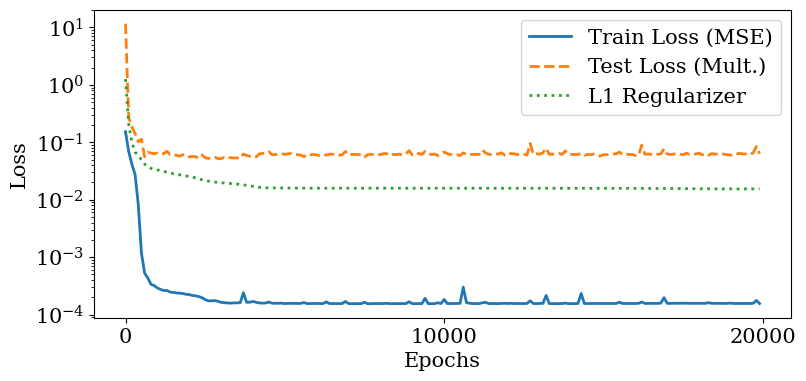

In [2]:
from matplotlib import pyplot as plt

eta = 0.001
epochs = 20000
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'serif'
num_ticks = 2

fig, ax = plt.subplots(1,1, figsize = (9,4))
ax.plot(mse_losses[0:epochs:100].detach(), label='Train Loss (MSE)')
ax.plot(test_losses[0:epochs:100].detach(), label='Test Loss (Mult.)', ls='dashed')
ax.plot((eta * l1_regs)[0:epochs:100].detach(), label='L1 Regularizer', ls='dotted')

ax.set_xticks(range(0, len(model_checkpoints)+1, len(model_checkpoints) // num_ticks))
ax.set_xticklabels(range(0, epochs+1, epochs // num_ticks))
ax.set_xlabel('Epochs')

ax.set_yscale('log')
ax.set_ylabel('Loss')

fig.legend(bbox_to_anchor=(.9,.88), loc='upper right')
plt.savefig('../images/bellman_ford_no_self_loops_loss.pdf', bbox_inches='tight')

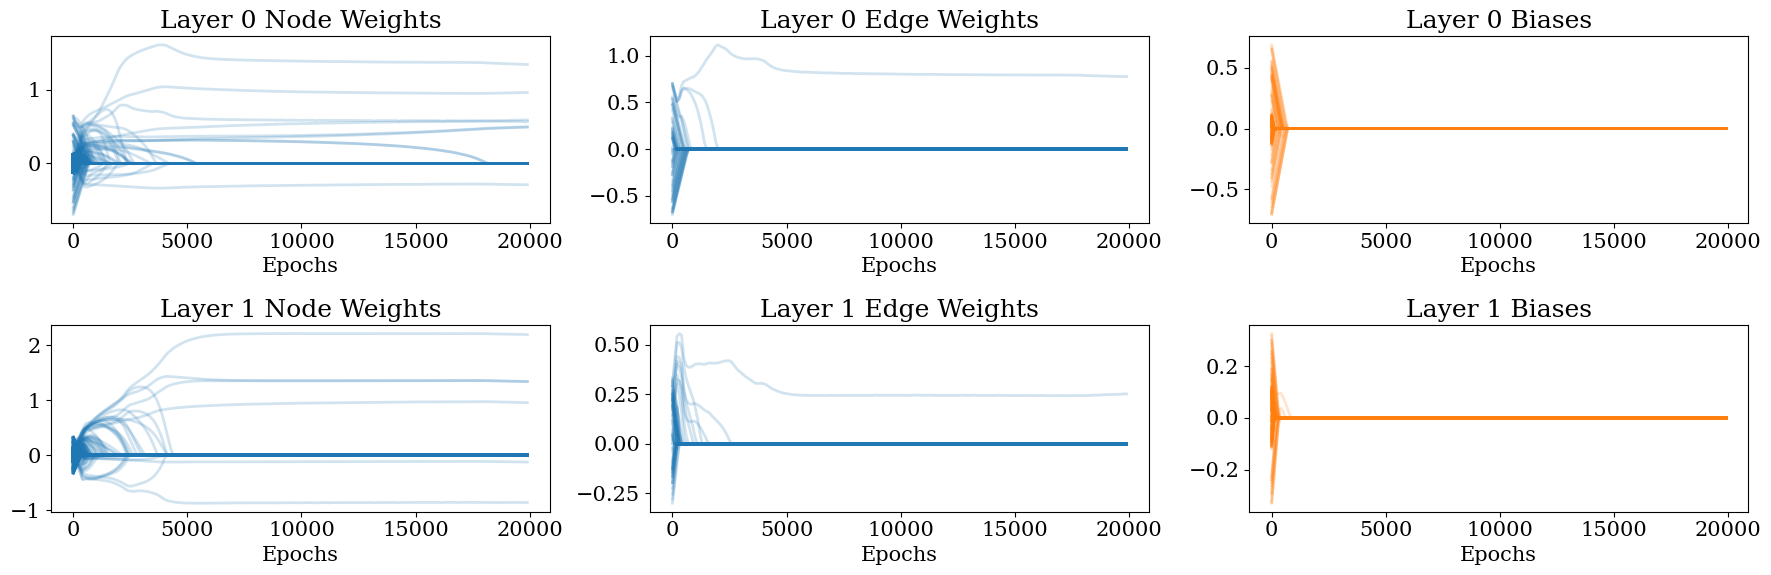

In [3]:
import matplotlib.pyplot as plt
state_dict = model_checkpoints[-1]
node_weights_0 = torch.empty((len(model_checkpoints),
                         len(state_dict['convs.0.agg_mlp.lins.0.weight'][:,:-1].flatten())
                         + len(state_dict['convs.0.agg_mlp.lins.1.weight'][:,:-1].flatten())
                         + len(state_dict['convs.0.up_mlp.lins.0.weight'][:,:-1].flatten())
                         + len(state_dict['convs.0.up_mlp.lins.1.weight'][:,:-1].flatten())
                         ))
node_weights_1 = torch.empty((len(model_checkpoints),
                         len(state_dict['convs.1.agg_mlp.lins.0.weight'][:,:-1].flatten())
                         + len(state_dict['convs.1.agg_mlp.lins.1.weight'][:,:-1].flatten())
                         + len(state_dict['convs.1.up_mlp.lins.0.weight'][:,:-1].flatten())
                         + len(state_dict['convs.1.up_mlp.lins.1.weight'][:,:-1].flatten())
                         ))
edge_weights_0 = torch.empty((len(model_checkpoints),
                         len(state_dict['convs.0.agg_mlp.lins.0.weight'][:,-1].flatten())
                         ))
edge_weights_1 = torch.empty((len(model_checkpoints),
                         len(state_dict['convs.1.agg_mlp.lins.0.weight'][:,-1].flatten())
                         ))
biases_0 = torch.empty((len(model_checkpoints),
                         len(state_dict['convs.0.agg_mlp.lins.0.bias'].flatten())
                         + len(state_dict['convs.0.agg_mlp.lins.1.bias'].flatten())
                         + len(state_dict['convs.0.up_mlp.lins.0.bias'].flatten())
                         + len(state_dict['convs.0.up_mlp.lins.1.bias'].flatten())
                         ))
biases_1 = torch.empty((len(model_checkpoints),
                         len(state_dict['convs.1.agg_mlp.lins.0.bias'].flatten())
                         + len(state_dict['convs.1.agg_mlp.lins.1.bias'].flatten())
                         + len(state_dict['convs.1.up_mlp.lins.0.bias'].flatten())
                         + len(state_dict['convs.1.up_mlp.lins.1.bias'].flatten())
                         ))
for i, checkpoint in enumerate(model_checkpoints):
    node_weights_0[i] = torch.cat((checkpoint['convs.0.agg_mlp.lins.0.weight'][:,:-1].flatten(),
                              checkpoint['convs.0.agg_mlp.lins.1.weight'][:,:-1].flatten(),
                              checkpoint['convs.0.up_mlp.lins.0.weight'][:,:-1].flatten(),
                              checkpoint['convs.0.up_mlp.lins.1.weight'][:,:-1].flatten()))
    node_weights_1[i] = torch.cat((checkpoint['convs.1.agg_mlp.lins.0.weight'][:,:-1].flatten(),
                              checkpoint['convs.1.agg_mlp.lins.1.weight'][:,:-1].flatten(),
                              checkpoint['convs.1.up_mlp.lins.0.weight'][:,:-1].flatten(),
                              checkpoint['convs.1.up_mlp.lins.1.weight'][:,:-1].flatten()))
    edge_weights_0[i] = checkpoint['convs.0.agg_mlp.lins.0.weight'][:,-1].flatten()
    edge_weights_1[i] = checkpoint['convs.1.agg_mlp.lins.0.weight'][:,-1].flatten()
    biases_0[i] = torch.cat((checkpoint['convs.0.agg_mlp.lins.0.bias'].flatten(),
                              checkpoint['convs.0.agg_mlp.lins.1.bias'].flatten(),
                              checkpoint['convs.0.up_mlp.lins.0.bias'].flatten(),
                              checkpoint['convs.0.up_mlp.lins.1.bias'].flatten()))
    biases_1[i] = torch.cat((checkpoint['convs.1.agg_mlp.lins.0.bias'].flatten(),
                              checkpoint['convs.1.agg_mlp.lins.1.bias'].flatten(),
                              checkpoint['convs.1.up_mlp.lins.0.bias'].flatten(),
                              checkpoint['convs.1.up_mlp.lins.1.bias'].flatten()))
    
fig, ax = plt.subplots(2,3, figsize = (18,6))

n_ticks = 5
ax[0,0].set_title('Layer 0 Node Weights')
ax[0,0].plot(node_weights_0.detach(), c = 'tab:blue', alpha = 0.2)

ax[0,1].set_title('Layer 0 Edge Weights')
ax[0,1].plot(edge_weights_0.detach(), c = 'tab:blue', alpha = 0.2)

ax[0,2].set_title('Layer 0 Biases')
ax[0,2].plot(biases_0.detach(), c = 'tab:orange', alpha = 0.2)

ax[1,0].set_title('Layer 1 Node Weights')
ax[1,0].plot(node_weights_1.detach(), c = 'tab:blue', alpha = 0.2)

ax[1,1].set_title('Layer 1 Edge Weights')
ax[1,1].plot(edge_weights_1.detach(), c = 'tab:blue', alpha = 0.2)

ax[1,2].set_title('Layer 1 Biases')
ax[1,2].plot(biases_1.detach(), c = 'tab:orange', alpha = 0.2)

for axes in ax.flatten():
    axes.set_xticks(range(0, len(model_checkpoints)+1, len(model_checkpoints) // 4))
    axes.set_xticklabels(range(0, epochs+1, epochs // 4))
    axes.set_xlabel('Epochs')

# fig.suptitle('Parameter Summary')
fig.tight_layout()
plt.savefig('../images/bellman_ford_no_self_loops_params.pdf', bbox_inches='tight')
plt.savefig('../images/bellman_ford_no_self_loops_params.png', dpi=300, bbox_inches='tight')